In [2]:
# Mount  Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Epoch 1/5
235/235 [==============================] - 3s 11ms/step - loss: 0.6957 - val_loss: 0.6956
Epoch 2/5
235/235 [==============================] - 3s 15ms/step - loss: 0.6955 - val_loss: 0.6953
Epoch 3/5
235/235 [==============================] - 3s 13ms/step - loss: 0.6952 - val_loss: 0.6951
Epoch 4/5
235/235 [==============================] - 2s 11ms/step - loss: 0.6949 - val_loss: 0.6948
Epoch 5/5
313/313 [==============================] - 1s 2ms/step


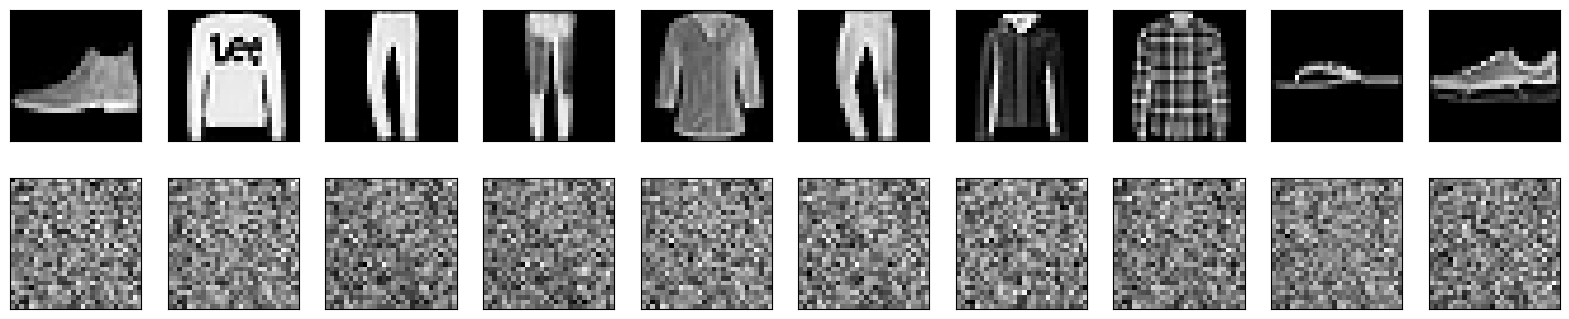

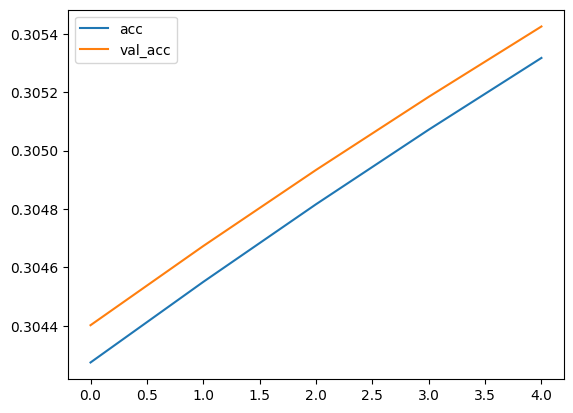

In [9]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np

# Model architecture
encoding_dim = 32
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Data
from keras.datasets import fashion_mnist
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Train
history = autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Make predictions
x_test_predicted = autoencoder.predict(x_test)

# Visualize original and reconstructed images
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


# Calculate accuracy
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = [1 - x for x in loss]
val_accuracy = [1 - x for x in val_loss]

# Plot accuracy
plt.plot(accuracy, label='acc')
plt.plot(val_accuracy, label='val_acc')
plt.legend()
plt.show()

Epoch 1/10
235/235 [==============================] - 4s 13ms/step - loss: 0.6956 - val_loss: 0.6955
Epoch 2/10
235/235 [==============================] - 3s 14ms/step - loss: 0.6954 - val_loss: 0.6953
Epoch 3/10
235/235 [==============================] - 4s 16ms/step - loss: 0.6953 - val_loss: 0.6952
Epoch 4/10
235/235 [==============================] - 3s 11ms/step - loss: 0.6951 - val_loss: 0.6950
Epoch 5/10
235/235 [==============================] - 3s 11ms/step - loss: 0.6950 - val_loss: 0.6949
Epoch 6/10
235/235 [==============================] - 3s 11ms/step - loss: 0.6948 - val_loss: 0.6947
Epoch 7/10
235/235 [==============================] - 4s 15ms/step - loss: 0.6947 - val_loss: 0.6946
Epoch 8/10
235/235 [==============================] - 4s 15ms/step - loss: 0.6945 - val_loss: 0.6944
Epoch 9/10
235/235 [==============================] - 3s 11ms/step - loss: 0.6944 - val_loss: 0.6943
Epoch 10/10
313/313 [==============================] - 1s 2ms/step


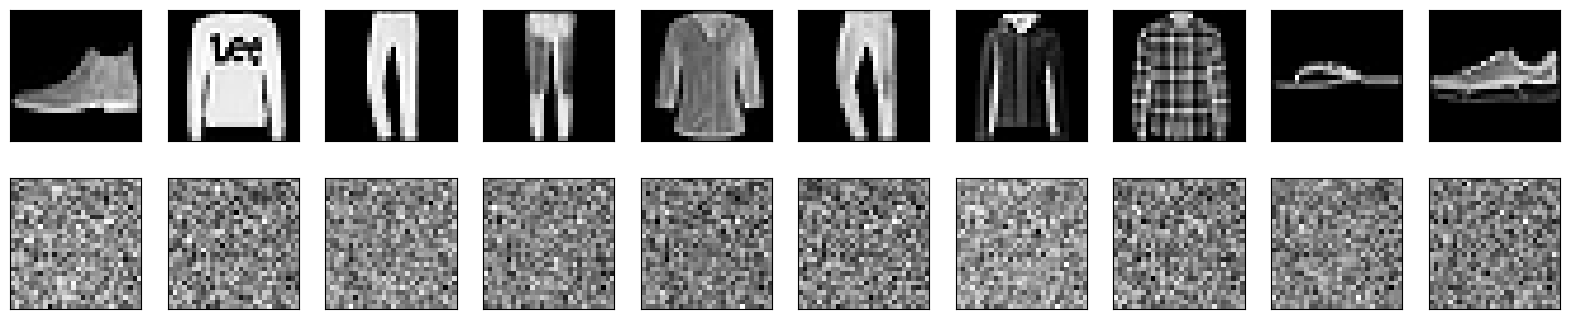

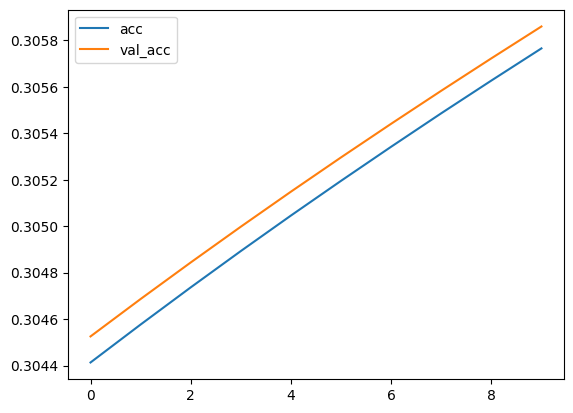

In [8]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np

# Model architecture
encoding_dim = 32
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
hidden = Dense(64, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(hidden)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Data
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Introduce noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Train
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

# Predictions
x_test_predicted = autoencoder.predict(x_test_noisy)

# Visualize
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Calculate accuracy
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = [1 - x for x in loss]
val_accuracy = [1 - x for x in val_loss]

# Plot accuracy
plt.plot(accuracy, label='acc')
plt.plot(val_accuracy, label='val_acc')
plt.legend()
plt.show()